In [42]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [43]:
# Carregando arquivo
df = pd.read_csv("../ETL_Python/amazon_tratado_orange.csv")

# Identificando as colunas
print("Colunas originais:", df.columns.tolist())

# Removendo 'tamanho_nome' e 'tamanho_descricao'
colunas_para_remover = ['tamanho_nome', 'tamanho_descricao']
df = df.drop(columns=[col for col in colunas_para_remover if col in df.columns])

Colunas originais: ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'Classificacao de Vendas', 'tamanho_nome', 'tamanho_descricao', 'categoria_principal']


In [44]:
# Pipeline automático de ML

# Define quem é o X (dados) e o y (o que prever)
X = df.drop(columns=['Classificacao de Vendas'])
y = df['Classificacao de Vendas']

# Separa automaticamente o que é Texto e Número
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Criando o processador que lida com categorias sozinho
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline com Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight="balanced",random_state=42))])

In [45]:
# Calculamos a acurácia média em 5 divisões diferentes dos dados
scores = cross_val_score(model, X, y, cv=5)
print(f"Acurácia Média (Cross-Validation): {scores.mean():.2f}")

#Treino e Avaliação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

# Relatório de Classificação
y_pred = model.predict(X_test)
print("\n--- Resultado do Modelo ---")
print(classification_report(y_test, y_pred))

Acurácia Média (Cross-Validation): 0.75

--- Resultado do Modelo ---
                         precision    recall  f1-score   support

         Fracasso/Nicho       0.61      0.38      0.47       108
       Sucesso Moderado       0.80      0.91      0.85       322
Viral/Sucesso de Vendas       0.50      0.22      0.31         9

               accuracy                           0.77       439
              macro avg       0.64      0.50      0.54       439
           weighted avg       0.75      0.77      0.75       439




--- Matriz de Confusão ---


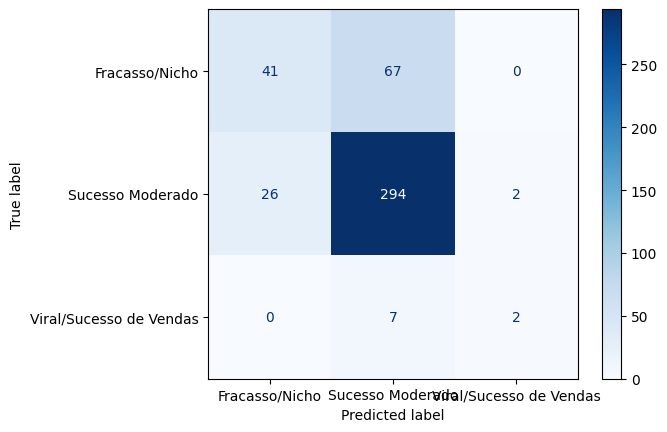

In [46]:
#Matriz de Confusão (Visualização estilo Orange)
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [47]:
# Previsão com novo produto - Testando um produto fictício
novos_produtos = pd.read_csv("../ETL_Python/Base_Teste.xlsx.csv")

previsoes = model.predict(novos_produtos)
print(f"\n--- Previsões ---")
for i, resultado in enumerate(previsoes):
    print(f"Produto {i+1}: Potencial para ser {resultado}")


--- Previsões ---
Produto 1: Potencial para ser Sucesso Moderado
Produto 2: Potencial para ser Sucesso Moderado
Produto 3: Potencial para ser Sucesso Moderado
Produto 4: Potencial para ser Sucesso Moderado
Produto 5: Potencial para ser Sucesso Moderado
Produto 6: Potencial para ser Sucesso Moderado
Produto 7: Potencial para ser Fracasso/Nicho
Produto 8: Potencial para ser Sucesso Moderado
Produto 9: Potencial para ser Sucesso Moderado
Produto 10: Potencial para ser Sucesso Moderado
